In [1]:
import numpy as np
import seaborn as sb

from IPython.display import Image
from math import sqrt
from matplotlib import pyplot as plt
from scipy import stats
from statistics import mean, stdev
from statsmodels.stats.power import TTestIndPower



In [2]:
np.random.seed(42)

In [3]:
# Create two distributions with different mean from standard normal
dist1_mu = 4.75
dist2_mu = 5.0
same_sigma = 1
n1 = 40


In [4]:
def two_dists(mu1, mu2, n1, n2, sigma1, sigma2=None, ):
    if not sigma2:
        sigma2=sigma1
    dist1 = np.random.normal(mu1, sigma1, n1)
    dist2 = np.random.normal(mu2, sigma2, n2)
    return dist1, dist2

In [5]:
dist1, dist2 = two_dists(mu1=dist1_mu, mu2=dist2_mu, sigma1=1, n1=40, n2=40)

In [6]:
t_result= stats.ttest_ind(dist1,dist2, alternative='two-sided')
print(f"The t-statistic is {t_result[0]}")
print(f"The p-value is {t_result[1]}")

The t-statistic is -2.050382870249538
The p-value is 0.0436864748378121


In [7]:
degrees_of_freedom = len(dist1) + len(dist2) - 2
lower_critical_value = stats.t.ppf(q=0.025, df=degrees_of_freedom)
upper_critical_value = stats.t.ppf(q=0.975, df=degrees_of_freedom)
print(f'For \N{GREEK SMALL LETTER ALPHA} level of 0.05 and {degrees_of_freedom} degrees of freedom, the critical values are {lower_critical_value} and {upper_critical_value}')

For α level of 0.05 and 78 degrees of freedom, the critical values are -1.9908470685550523 and 1.990847068555052


# Explainer

The code below calls `scipiy.stats.t.rvs(df, size`, `random_state`). 

In the cases below, I have only inputed variables for the degrees of freedom, `df`, `random_state`,  and the `size`. 
Degrees of freedom in both cases is 78.

The `size` variable defines the number of the random variates drawn from the distribution.

Therefore, the degrees of freedom for the plots match the t-test degrees of freedom, regardless of the value of the `size` variable. 

In the first plot below, `size` is 10,000, meaning there are 10,000 draws from a t-distribution with 78 degrees of freedom. 

In the second plot below,  `size` is 78, meaning that there are 78 draws from a t-distributions with 78 degrees of freedom.  

See: 
* [Documentation for `scipy.stats.rv_continuous.rvs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html)
* [Documentation for `scipy.stats.t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)


# Visual Representation

In [8]:
def t_dist_plot(fig_size,distribution1, distribution2, lower_crit_val, upper_crit_val, t_stat, two_tail=True,
               size=10000):
    sb.set(rc={"figure.figsize":(fig_size[0], fig_size[1])})
    degrees_of_freedom = len(distribution1) + len(distribution2) - 2
    t_sample= stats.t.rvs(df=degrees_of_freedom,size=size, random_state=42)
    ax = sb.kdeplot(t_sample, legend=True)
    x = ax.lines[0].get_xdata()
    y = ax.lines[0].get_ydata()
    ax.vlines(lower_crit_val, 0, np.interp(lower_critical_value, x, y), linestyle='-', color='black', alpha=.4)
    ax.fill_between(x, 0, y, where=x < lower_critical_value, color='gold', alpha=0.3)
    ax.vlines(upper_crit_val, 0, np.interp(upper_crit_val, x, y), linestyle='-', color='black', alpha=.4)
    ax.fill_between(x, 0, y, where=x > upper_crit_val, color='gold', alpha=0.3)
    ax.vlines(t_stat,0, np.interp(t_stat,x,y), linestyle='-', color='red', alpha=0.8)
    if two_tail:
        ax.vlines(-t_stat,0, np.interp(t_stat,x,y), linestyle='-', color='red', alpha=0.8)


        


# Example data for 10,000 draws from a t-distribution 

In [9]:
stats.t.rvs(df=degrees_of_freedom,size=10000, random_state=42)[0:500]

array([ 5.04448428e-01, -1.08862838e+00,  1.49293753e+00, -6.08907727e-01,
        2.85828370e-01,  9.31763634e-01, -1.02623566e+00, -6.02971598e-01,
       -5.41883866e-01, -5.59662449e-01, -5.24298727e-01, -5.36182386e-01,
        9.14356641e-01,  2.54238526e+00,  7.31539464e-01, -1.15763093e+00,
       -4.25908960e-01, -1.12325160e+00, -6.47716524e-01,  5.45246109e-01,
       -8.64225267e-01, -1.38994598e+00, -1.22722078e+00,  8.18783810e-01,
        3.82879900e-01,  1.46193284e+00, -2.46624184e+00, -1.31324573e+00,
       -2.14430014e-01, -7.47508864e-01, -8.45867439e-01,  4.60098711e-01,
       -5.10812635e-01,  1.35854048e+00, -7.24065485e-01,  1.30984055e+00,
        5.23386434e-03, -4.06634747e-01, -1.56855817e-01, -8.49437642e-01,
       -1.93113964e+00,  1.06469937e-01, -1.88596995e-01,  3.41485193e-01,
        1.08168306e+00, -7.23307198e-01,  4.98966282e-01, -4.60920746e-01,
        1.04272707e-01,  9.46037330e-03, -1.02749753e+00,  6.31369990e-01,
       -8.07441509e-01, -

# Plot of 10,000 samples from a t-distribution with  78 Degrees of Freedom 

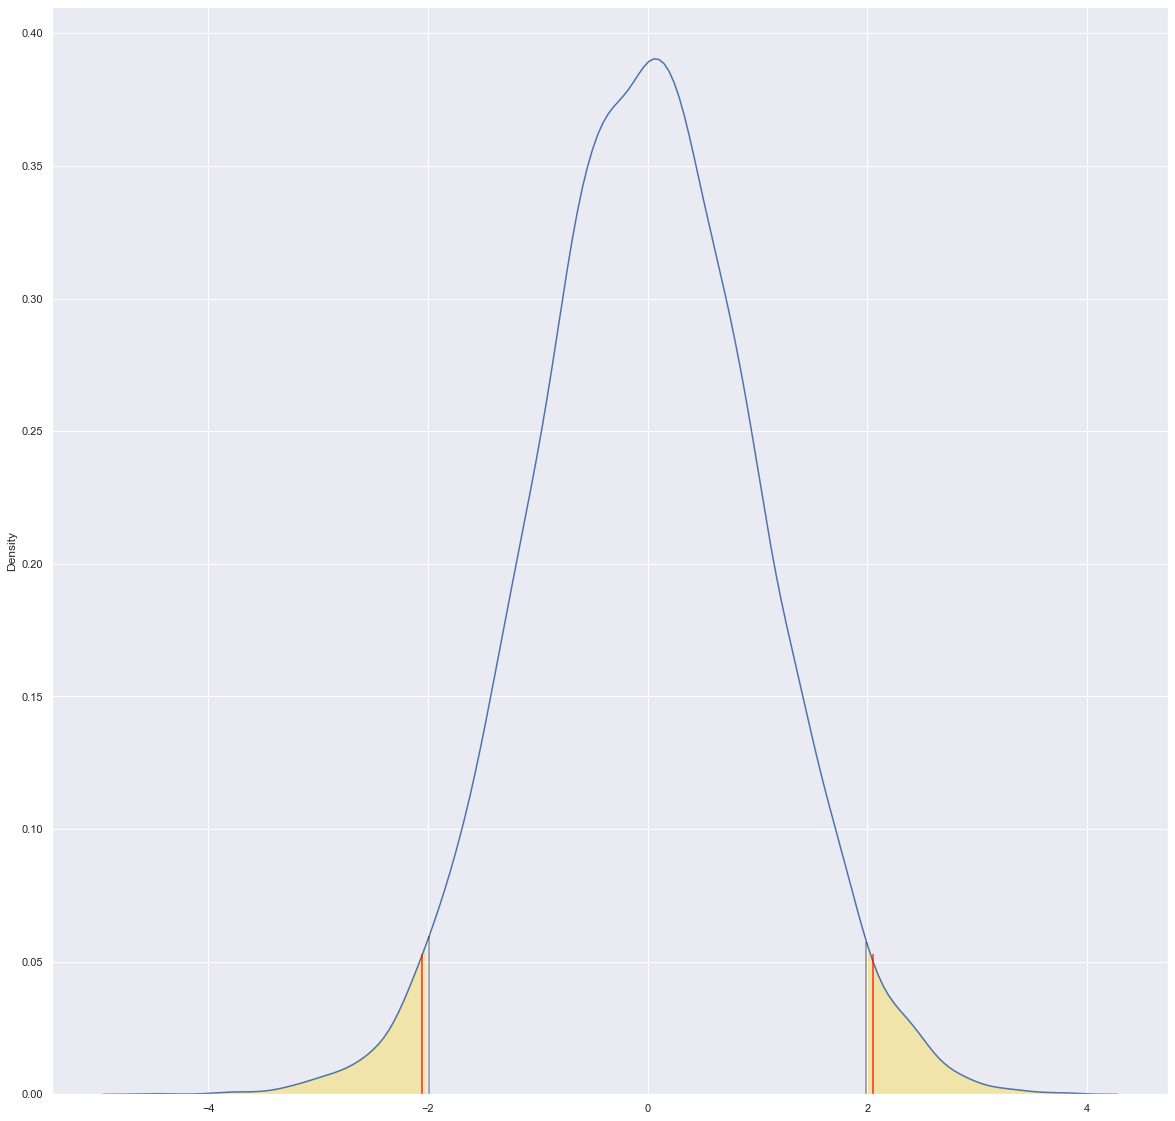

In [13]:
t_dist_plot(fig_size=[20,20],
            distribution1=dist1,
            distribution2=dist2,
            lower_crit_val=lower_critical_value,
            upper_crit_val=upper_critical_value,
            t_stat=t_result[0],
            two_tail=True)

## Comment
I think that the reasons that the red lines are not perfectly even with the curve are: 
1) Interpolation is used to get the red line height

2) The distribution curves are not symmetrical given that they are draws from a random value and therefore not perfect. 

# Example data for 78 draws from a t-distribution

In [11]:
stats.t.rvs(df=degrees_of_freedom,size=78, random_state=42)

array([ 0.50444843, -1.08862838,  1.49293753, -0.60890773,  0.28582837,
        0.93176363, -1.02623566, -0.6029716 , -0.54188387, -0.55966245,
       -0.52429873, -0.53618239,  0.91435664,  2.54238526,  0.73153946,
       -1.15763093, -0.42590896, -1.1232516 , -0.64771652,  0.54524611,
       -0.86422527, -1.38994598, -1.22722078,  0.81878381,  0.3828799 ,
        1.46193284, -2.46624184, -1.31324573, -0.21443001, -0.74750886,
       -0.84586744,  0.46009871, -0.51081263,  1.35854048, -0.72406549,
        1.30984055,  0.00523386, -0.40663475, -0.15685582, -0.84943764,
       -1.93113964,  0.10646994, -0.188597  ,  0.34148519,  1.08168306,
       -0.7233072 ,  0.49896628, -0.46092075,  0.10427271,  0.00946037,
       -1.02749753,  0.63136999, -0.80744151, -0.3428352 ,  0.20637184,
       -0.33135655,  0.24541217,  1.40156646,  0.2447214 ,  0.2126113 ,
        0.31208649,  0.19428104, -1.13593407, -0.82857136,  0.93627254,
       -0.86125196, -0.95531702,  0.89973072,  0.01166788, -1.41

# Plot of 78 samples from a t-distribution with  78 Degrees of Freedom 

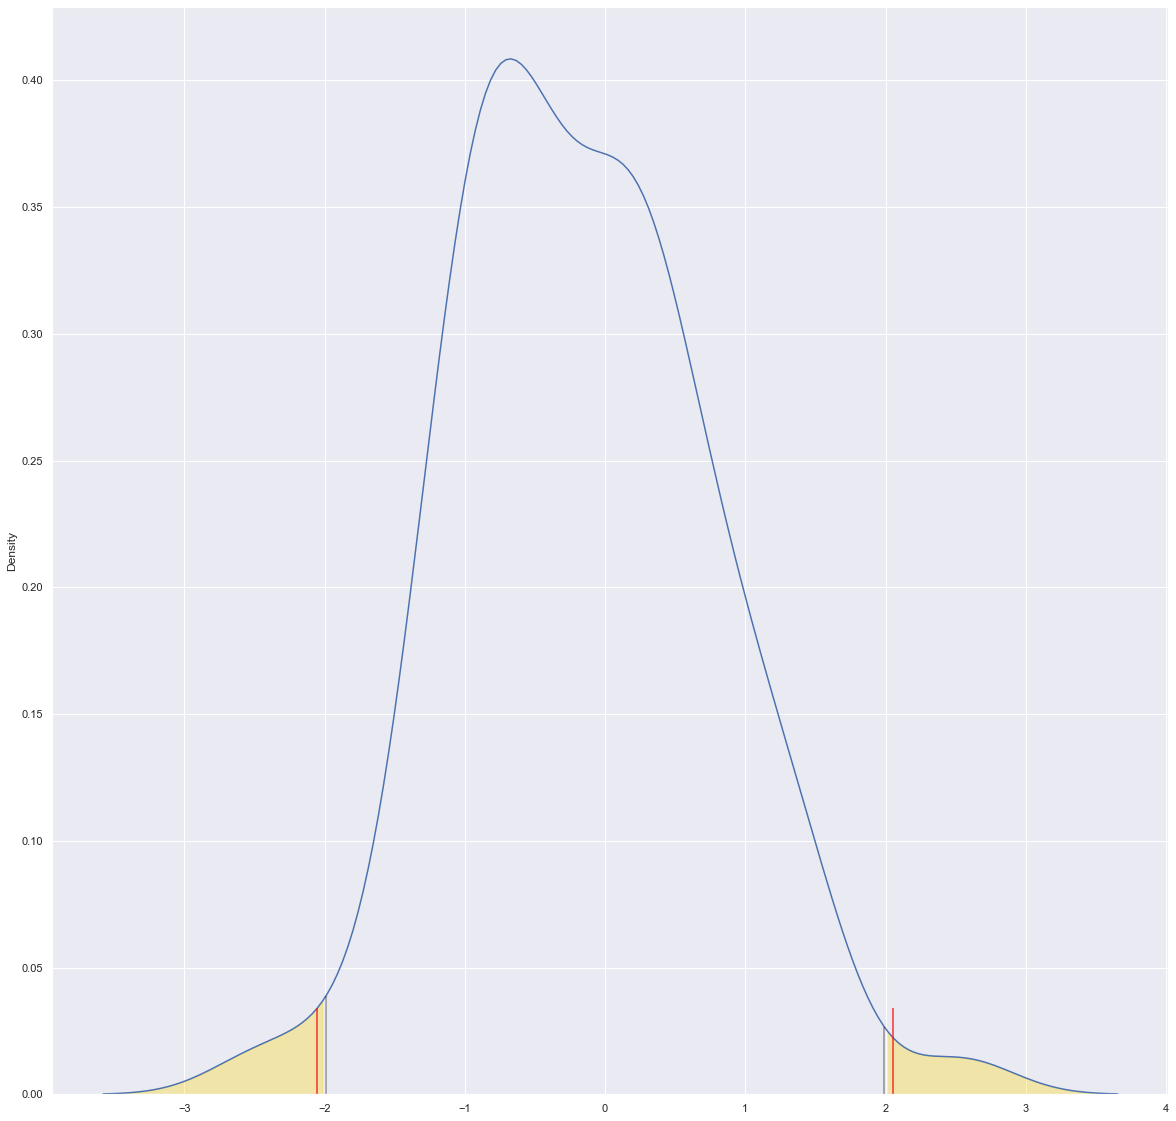

In [12]:
t_dist_plot(fig_size=[20,20],
            distribution1=dist1,
            distribution2=dist2,
            lower_crit_val=lower_critical_value,
            upper_crit_val=upper_critical_value,
            t_stat=t_result[0],
            two_tail=True,
            size=78)